In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y = pd.DataFrame(housing.target, columns=["target"])
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [7]:
LAYERS = [
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1),
]

In [8]:
model = tf.keras.models.Sequential(LAYERS)

In [9]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(loss=LOSS, optimizer=OPTIMIZER)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)


In [12]:
EPOCHS = 20

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid) )

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 1.2623 - val_loss: 0.5564
Epoch 2/20
363/363 [==============================] - 3s 9ms/step - loss: 0.4514 - val_loss: 0.4740
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4229 - val_loss: 0.4569
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3928 - val_loss: 0.4443
Epoch 5/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3755 - val_loss: 0.4337
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3683 - val_loss: 0.4281
Epoch 7/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3616 - val_loss: 0.4327
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3550 - val_loss: 0.4222
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3509 - val_loss: 0.4170
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3465 - val_loss: 0.4148

<Axes: >

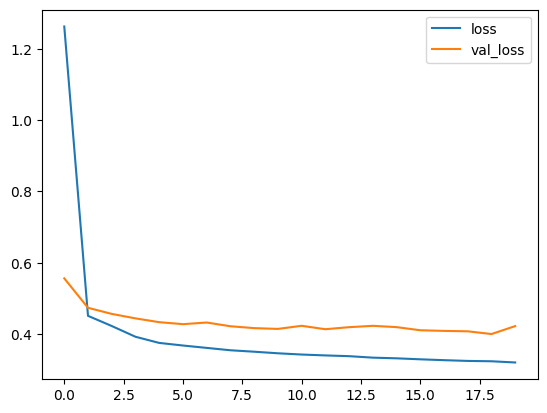

In [13]:
pd.DataFrame(history.history).plot()

In [14]:
model_2 = tf.keras.Sequential(LAYERS)

EPOCHS = 50

LOSS = "mse"
OPTIMIZER = "sgd"

model_2.compile(loss=LOSS, optimizer=OPTIMIZER)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


history = model_2.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid), callbacks=CALLBACKS)

Epoch 1/50
363/363 [==============================] - 3s 6ms/step - loss: 0.3173 - val_loss: 0.4043
Epoch 2/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3162 - val_loss: 0.4089
Epoch 3/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3141 - val_loss: 0.4056
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3139 - val_loss: 0.4046
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3110 - val_loss: 0.4056
Epoch 6/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3264 - val_loss: 0.4080


In [15]:
%load_ext tensorboard

In [16]:
%tensorboard --logdir="/content/logs"

<IPython.core.display.Javascript object>